<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/ChangHe/blob/main/ChangHe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train your own image classification model on a collection of images with at least 4 different categories.

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

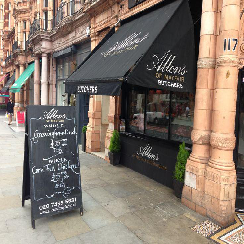

In [ ]:
calligraphyonthesignboard_image_id = os.listdir('/content/drive/MyDrive/images/calligraphy on the signboard')[0]
calligraphyonthesignboard_path = os.path.join('/content/drive/MyDrive/images/calligraphy on the signboard', calligraphyonthesignboard_image_id)
calligraphyonthesignboard_image = load_image(calligraphyonthesignboard_path)

tf.keras.preprocessing.image.load_img(calligraphyonthesignboard_path, target_size=(244,244))

In [ ]:
model.predict(calligraphyonthesignboard_image)

1/1 [==============================] - 1s 776ms/step


array([[8.24552046e-07, 5.44809609e-07, 2.77847022e-07, 1.10062001e-06,
        2.72511699e-07, 3.00743773e-06, 1.00728664e-06, 4.63318938e-05,
        6.70644113e-06, 5.06487822e-07, 3.12264063e-07, 5.70662380e-08,
        3.49588760e-07, 5.79982157e-07, 4.50873540e-06, 5.52032589e-06,
        2.67766018e-06, 2.30546698e-06, 1.66905488e-06, 3.56378763e-07,
        3.22674936e-08, 4.00683398e-08, 2.31884144e-07, 1.45994920e-06,
        2.23771258e-06, 1.31331035e-07, 5.87356283e-07, 8.92570355e-08,
        1.79641901e-08, 1.58236261e-07, 5.68627627e-07, 4.39923411e-07,
        1.98426642e-06, 2.94715983e-06, 5.00444094e-06, 2.50819830e-05,
        1.05582330e-05, 6.61055068e-08, 3.86094342e-07, 8.33210549e-08,
        9.89797081e-06, 1.53611694e-07, 8.98798760e-07, 8.83822122e-06,
        8.99278859e-07, 2.23777874e-06, 1.27061003e-06, 2.16844137e-06,
        4.57687747e-06, 8.57257510e-06, 8.23911068e-06, 1.12414034e-06,
        1.42461204e-05, 3.99886488e-07, 1.27567475e-07, 2.240828

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model.predict(calligraphyonthesignboard_image).shape

1/1 [==============================] - 0s 475ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 682 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


In [ ]:
batch_size = 8

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=1,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
    )

22/85 [======>.......................] - ETA: 11:25 - loss: 2.0793

85/85 [==============================] - 267s 3s/step - loss: 2.0793 - val_loss: 1.5442


In [ ]:
random_calligraphyonthesignboard = random.choice(os.listdir('/content/drive/MyDrive/images/calligraphy on the signboard'))
calligraphyonthesignboard_path = os.path.join('/content/drive/MyDrive/images/calligraphy on the signboard',random_calligraphyonthesignboard)
calligraphyonthesignboard = load_image(calligraphyonthesignboard_path)
random_calligraphyontheceilng = random.choice(os.listdir('/content/drive/MyDrive/images/calligraphy on the ceiling'))
calligraphyontheceiling_path = os.path.join('/content/drive/MyDrive/images/calligraphy on the ceiling',random_calligraphyontheceiling)
calligraphyontheceiling = load_image(calligraphyontheceiling_path)
random_calligraphyontheroof = random.choice(os.listdir('/content/drive/MyDrive/images/calligraphy on the roof'))
calligraphyontheroof_path = os.path.join('/content/drive/MyDrive/images/calligraphy on the roof',random_calligraphyontheroof)
calligraphyontheroof = load_image(calligraphyontheroof_path)
random_calligraphyattheentrance = random.choice(os.listdir('/content/drive/MyDrive/images/calligraphy at the entrance'))
calligraphyattheentrance_path = os.path.join('/content/drive/MyDrive/images/calligraphy at the entrance',random_calligraphyattheentrance)
calligraphyattheentrance = load_image(calligraphyattheentrance_path)

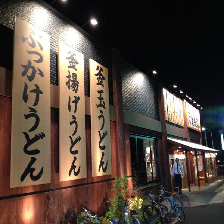

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyonthesignboard_path, target_size=(224,224))

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyontheceiling_path, target_size=(224,224))

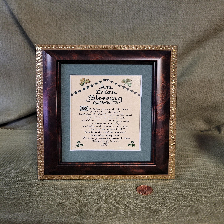

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyontheroof_path, target_size=(224,224))

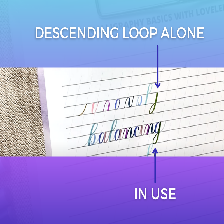

In [ ]:
tf.keras.preprocessing.image.load_img(calligraphyattheentrance_path, target_size=(224,224))

In [ ]:
print(f'''calligraphyonthesignboard:{np.round(model.predict(calligraphyonthesignboard),2)}''')

1/1 [==============================] - 0s 62ms/step
calligraphyonthesignboard:[[0.36 0.27 0.2  0.17]]


In [ ]:
print(f'''calligraphyontheceiling:{np.round(model.predict(calligraphyontheceiling),2)}''')

1/1 [==============================] - 0s 62ms/step
calligraphyontheceiling:[[0.73 0.13 0.13 0.02]]


In [ ]:
print(f'''calligraphyontheroof:{np.round(model.predict(calligraphyontheroof),2)}''')

1/1 [==============================] - 0s 59ms/step
calligraphyontheroof:[[0.42 0.07 0.47 0.04]]


In [ ]:
print(f'''calligraphyattheentrance:{np.round(model.predict(calligraphyattheentrance),2)}''')

1/1 [==============================] - 0s 57ms/step
calligraphyattheentrance:[[0.3  0.03 0.1  0.57]]


Run the video model on multiple videos using the score setting and explore the outcomes through moviepy


In [ ]:
# https://github.com/Zulko/moviepy
!pip install --upgrade moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! git clone https://github.com/kenshohara/video-classification-3d-cnn-pytorch.git

Cloning into 'video-classification-3d-cnn-pytorch'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 158.63 KiB | 731.00 KiB/s, done.
Resolving deltas: 100% (63/63), done.


In [ ]:
%cd video-classification-3d-cnn-pytorch/

/content/video-classification-3d-cnn-pytorch/video-classification-3d-cnn-pytorch/video-classification-3d-cnn-pytorch


In [ ]:
def loadVideosToInfile(folder):
    videos = os.listdir(folder)
    with open('input', 'w') as inputfile:
      for v in videos:
        if v.split('.')[-1] == 'mp4':
          inputfile.write(v+'\n')

In [ ]:
loadVideosToInfile('/content/drive/MyDrive/allvideostuff/video/videotoprocess')

In [ ]:
! python main.py --input input --video_root /content/drive/MyDrive/allvideostuff/video/videotoprocess --output /content/drive/MyDrive/allvideostuff/video/output.json --model /content/drive/MyDrive/allvideostuff/video/resnet-34-kinetics-cpu.pth --model_depth 34 --no_cuda --mode score --resnet_shortcut A

loading model /content/drive/MyDrive/allvideostuff/video/resnet-34-kinetics-cpu.pth
/content/drive/MyDrive/allvideostuff/video/videotoprocess/calligraphy.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libthe

In [ ]:
! python generate_result_video/generate_result_video.py /content/drive/MyDrive/allvideostuff/video/output.json /content/drive/MyDrive/allvideostuff/video/videotoprocess /content/drive/MyDrive/allvideostuff/video/videos_pred class_names_list 5

/content/drive/MyDrive/allvideostuff/video/videotoprocess/calligraphy.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --ena

In [ ]:
import json
file = open('/content/drive/MyDrive/allvideostuff/video/output.json')
segments = json.load(file)

In [ ]:
print(len(segments))

2


In [ ]:
segments[0].keys()

dict_keys(['video', 'clips'])

In [ ]:
segments[0]['video']

'calligraphy.mp4'

In [ ]:
segments[0]['clips'][0].keys()

dict_keys(['segment', 'label', 'scores'])

In [ ]:
segments[0]['clips'][0]['scores'][0]

0.13217362761497498

In [ ]:
segments[0]['clips'][0]['label']

'weaving basket'

In [ ]:
len(segments[0]['clips'][0]['scores'])

400

In [ ]:
classNames = []
with open('class_names_list', 'r') as class_names_list:
  index = 0
  for c in class_names_list:
    classNames.append({'index':index, 'name':c, 'score':0})
    index += 1

In [ ]:
classNames[0]

{'index': 0, 'name': 'abseiling\n', 'score': 0}

In [ ]:
for i in range(len(segments[0]['clips'][0]['scores'])):
  score = segments[0]['clips'][0]['scores'][i]
  classNames[i]['score'] = score

In [ ]:
classNames.sort(key = lambda x : x['score'], reverse = True)

In [ ]:
classNames[0:5]

[{'index': 390, 'name': 'weaving basket\n', 'score': 8.977234840393066},
 {'index': 74, 'name': 'counting money\n', 'score': 6.523043632507324},
 {'index': 369,
  'name': 'tying knot (not on a tie)\n',
  'score': 6.396766662597656},
 {'index': 187, 'name': 'making jewelry\n', 'score': 6.029132843017578},
 {'index': 63, 'name': 'cleaning shoes\n', 'score': 5.5655035972595215}]

In [ ]:
from moviepy.editor import VideoFileClip
video = VideoFileClip(r"/content/drive/MyDrive/allvideostuff/video/videotoprocess/calligraphy.mp4")
subVideo = video.subclip(50,60)
subVideo.write_videofile("/content/drive/MyDrive/allvideostuff/video/videoout/calligraphy.mp4", audio_codec='aac')

Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videoout/calligraphy.mp4.
MoviePy - Writing audio in calligraphyTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videoout/calligraphy.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videoout/calligraphy.mp4


In [ ]:
subVideo.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
video.fps

16.0

In [ ]:
frame_length = 1/video.fps

In [ ]:
label_periods = []
for f in segments:
  print(f['video'])
  currentLabel = None
  ts = 0
  te = 0
  for c in f['clips']:
    label = c['label']
    s = c['segment'][0]
    e = c['segment'][1]
    if label == currentLabel:
      te = e 
    else:
      label_periods.append([(ts,te),currentLabel])

      ts = s
      te = e 
      currentLabel = label

calligraphy.mp4
publicspace.mp4


In [ ]:
label_periods

[[(0, 0), None],
 [(1, 192), 'weaving basket'],
 [(193, 208), 'clay pottery making'],
 [(209, 304), 'weaving basket'],
 [(305, 320), 'clay pottery making'],
 [(321, 400), 'weaving basket'],
 [(401, 416), 'clay pottery making'],
 [(417, 432), 'weaving basket'],
 [(433, 464), 'clay pottery making'],
 [(465, 480), 'shuffling cards'],
 [(481, 496), 'clay pottery making'],
 [(497, 528), 'using computer'],
 [(529, 544), 'weaving basket'],
 [(545, 592), 'clay pottery making'],
 [(593, 768), 'weaving basket'],
 [(769, 784), 'clay pottery making'],
 [(785, 880), 'weaving basket'],
 [(881, 896), 'tying knot (not on a tie)'],
 [(897, 928), 'changing wheel'],
 [(929, 944), 'doing nails'],
 [(945, 960), 'making jewelry'],
 [(961, 976), 'tying knot (not on a tie)'],
 [(977, 1024), 'weaving basket'],
 [(1025, 1104), 'changing wheel'],
 [(1105, 1120), 'playing cards'],
 [(1121, 1136), 'shearing sheep'],
 [(1137, 1152), 'making jewelry'],
 [(1153, 1168), 'changing wheel'],
 [(1169, 1184), 'clay pottery

In [ ]:
len(label_periods)

63

In [ ]:
longPeriods = []
for lp in label_periods:
  if lp[0][1]-lp[0][0] > 5/frame_length:
    longPeriods.append(lp)

In [ ]:
longPeriods

[[(1, 192), 'weaving basket'],
 [(209, 304), 'weaving basket'],
 [(593, 768), 'weaving basket'],
 [(785, 880), 'weaving basket'],
 [(1393, 1520), 'weaving basket'],
 [(113, 368), 'setting table']]

In [ ]:
clips = []
for l in longPeriods:
  subclip = video.subclip(l[0][0]*frame_length,l[0][1]*frame_length)
  clips.append([subclip,l[1]+'_'+str(int(l[0][0]*frame_length))])

In [ ]:
clips

[[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x7fc8fdd72130>,
  'weaving basket_0'],
  'weaving basket_13'],
  'weaving basket_37'],
  'weaving basket_49'],
  'weaving basket_87'],
  'setting table_7']]

In [ ]:
clips[0][0].ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
folderPath = '/content/drive/MyDrive/allvideostuff/video/videoout'
for c in clips:
  c[0].write_videofile(folderPath + c[1] + '.mp4', audio_codec='aac')

Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_0.mp4.
MoviePy - Writing audio in videooutweaving basket_0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_0.mp4
Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_13.mp4.
MoviePy - Writing audio in videooutweaving basket_13TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_13.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_13.mp4
Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_37.mp4.
MoviePy - Writing audio in videooutweaving basket_37TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_37.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_37.mp4
Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_49.mp4.
MoviePy - Writing audio in videooutweaving basket_49TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_49.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_49.mp4
Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_87.mp4.
MoviePy - Writing audio in videooutweaving basket_87TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_87.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videooutweaving basket_87.mp4
Moviepy - Building video /content/drive/MyDrive/allvideostuff/video/videooutsetting table_7.mp4.
MoviePy - Writing audio in videooutsetting table_7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/allvideostuff/video/videooutsetting table_7.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/allvideostuff/video/videooutsetting table_7.mp4


Run the video model on multiple videos using the feature setting. Create functions to streamline the process as indicated.

In [ ]:
videos = os.listdir('/content/drive/MyDrive/allvideostuff/video/videotoprocess')

with open('input', 'w') as inputfile:
  for v in videos:
    if v.split('.')[-1] == 'mp4':
      inputfile.write(v+'\n')

In [323]:
!python main.py --input input --video_root /content/drive/MyDrive/allvideostuff/video/videotoprocess --output /content/drive/MyDrive/allvideostuff/video/videoout/outputpsAndcFeatures.json --model /content/drive/MyDrive/allvideostuff/video/resnet-34-kinetics-cpu.pth --model_depth 34 --mode feature --resnet_shortcut A --no_cuda

loading model /content/drive/MyDrive/allvideostuff/video/resnet-34-kinetics-cpu.pth
/content/drive/MyDrive/allvideostuff/video/videotoprocess/calligraphy.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libthe

In [324]:
file = open('/content/drive/MyDrive/allvideostuff/video/videoout/outputpsAndcFeatures.json')
segments = json.load(file)

In [325]:
len(segments)

2

In [326]:
for s in segments: print(s['video'])

calligraphy.mp4
publicspace.mp4


In [327]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [328]:
cFeatures = []
for s in segments[0]['clips']:
  cFeatures.append(np.array(s['features'])) 

In [329]:
print(len(cFeatures))

107


In [330]:
print(len(cFeatures[0]))

512


In [331]:
psFeatures = []
for s in segments[1]['clips']:
  psFeatures.append(np.array(s['features']))  

In [332]:
print(len(psFeatures))

40


In [333]:
bestRangeStart = 0
bestRangeScore = 100000000
for i in range(len(cFeatures)-len(psFeatures)):
  distance = 0
  for j in range(len(psFeatures)):
    d = np.linalg.norm(cFeatures[i+j]-psFeatures[j])
    distance += d
  print(distance)
  if distance < bestRangeScore:
    bestRangeScore = distance
    bestRangeStart = i

899.8747053949801
894.7282051510232
897.7991240862742
896.0111457404134
899.1825463871702
902.9198673965822
909.4401429291555
917.2051313694169
920.3106229218545
925.2662968233818
931.0498129450416
940.8135616083457
944.2733915837539
947.6413170398255
947.26763765997
947.5068783153462
948.3882380851489
948.4092441910393
945.6532049247127
946.6909884974048
946.5596414149097
943.6901723093391
941.3997736157277
937.6355157236492
929.3189853200714
923.8903253026535
913.1928356818568
908.3022027094114
913.7033078818916
919.3897050000346
915.7513629927791
918.0043847342595
918.176719690047
921.8088245820488
921.4476152859914
923.5136730325569
920.9725496357606
923.6687747878846
927.235016756244
929.9528949016404
931.6161874429912
927.440713375204
932.4976585573108
935.3749019196966
938.5926393910423
940.6667973207718
938.9766043579001
935.0814672703552
925.5733475545297
923.6988966189825
923.5012383158203
925.0850162992155
922.1506163708041
924.167684254966
928.0282659228565
929.625727475361

In [334]:
bestRangeStart

1

In [335]:
cVideo = VideoFileClip(r"/content/drive/MyDrive/allvideostuff/video/videotoprocess/calligraphy.mp4")
cfps = cVideo.fps
cFrameLength = 1/cfps

nrFrames = len(psFeatures)*16
startFrame = bestRangeStart*16

startTime = startFrame*cFrameLength
endTime = startTime+nrFrames*cFrameLength

cMatchedpsVideo = cVideo.subclip(startTime,endTime)

In [336]:
cMatchedpsVideo.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
